# **Used Cars Price Prediction**

## **Executive Summary**

This project focused on predicting used car prices by analyzing vehicle characteristics and evaluating multiple regression models, including linear models and non-linear, tree-based approaches. Through comprehensive exploratory data analysis and model comparison, it was found that non-linear relationships play a significant role in determining used car prices. Among all models, the non-linear Random Forest regression model demonstrated the strongest performance, achieving the highest predictive accuracy on the test dataset. This model outperformed linear and single-tree models by reducing prediction error and improving generalization.

Feature importance analysis of Random Forest revealed that engine power and vehicle year are the most influential factors in determining used car prices, indicating that performance capability and vehicle age have a greater impact on pricing than usage-related variables such as mileage alone. Thus, the final proposed solution is a Random Forest regression model trained on cleaned and encoded vehicle features, using an 80/20 train–test split for evaluation.

As next steps, further analysis could include applying Principal Component Analysis (PCA) and unsupervised learning techniques to explore natural groupings within the used car market. These insights could support market segmentation, differential pricing strategies, and more refined decision-making for dealerships and pricing platforms.

## **Problem & Solution Summary**
Pricing in the used car market is challenging because there is no standard pricing structure and every vehicle has its own characteristics and features. Inconsistent pricing can lead to lost revenue, reduced customer trust, and inefficient inventory movement, making it difficult for businesses to remain competitive in a rapidly growing market.

To address this challenge, a data-driven pricing approach was developed to learn pricing patterns directly from historical market data. The solution framework evaluates multiple modeling techniques and adopts an ensemble-based Random Forest method that can flexibly capture complex relationships between vehicle features. This approach provides a scalable and practical way to estimate fair market prices, supporting consistent valuation and enabling more informed pricing decisions aligned with business interests.

## **Problem Definition**

### *The Context:*

There is a high demand for used cars in the Indian market today. As sales of new cars have slowed down in recent years, the pre-owned car market has continued to grow and has now become larger than the new car market. As a result, more buyers are choosing used cars instead of purchasing new ones. Unlike new cars, pricing in the used car market is not straightforward and depends on many factors such as mileage, brand, model, year of manufacture, and the car usage. Because of this, sellers often struggle to set an accurate and competitive price for their vehicles. Therefore, having a reliable pricing strategy is crucial for businesses operating in this market.

### *The objective:*

 The objective of this project is to develop a pricing model that can accurately predict the prices of used cars based on historical data. Such a model can help the business in devising profitable strategies using differential pricing.

### *The key questions:*

The following key questions need to be addressed:
- How do different machine learning models perform in predicting used car prices?
- Which evaluation metrics are most appropriate for comparing model performance?
- Which model provides the best balance between predictive accuracy and generalization to unseen data?
- Is there any improvement in model performance through techniques such as regularization or hyperparameter tuning?

### *The problem formulation:*

The goal of this analysis is to predict the target variable "Price" using a set of explanatory features related to car specifications and history. By training and evaluating multiple regression models, the aim is to identify the most effective model for predicting used car prices accurately and reliably.

### *Data Dictionary*

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


### *Loading Data*

In [ ]:
# uploading the csv file

data = pd.read_csv("/Users/used_cars.csv")
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


In [3]:
# making a copy of the datapframe

df = data.copy()
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


From the initial look at the data, we can see that the "New_price" column contains missing values. We will review this column in more detail later and decide how to handle the missing values during the preprocessing step. We also observe that the S.No. column serves only as a serial identifier and does not carry predictive information. Such identifier columns are typically excluded from modeling and will be considered for removal during the data cleaning stage.

## **Exploratory Data Analysis**

### *Data Observation*

In [4]:
# getting the information about the data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


The dataset contains 7,253 rows and 14 columns. Some features are numeric (int64 and float64), while others are categorical (object). The categorical columns will need to be encoded later so they can be used in regression models.
The target variable, Price, contains missing values. Since a model cannot be trained without a known target, rows with missing Price values will be removed before modeling.
The New_price column has a large number of missing values, with data available for only a small portion of the dataset. This column will be analyzed separately later to decide whether it should be kept or dropped.
Other numeric columns such as Mileage, Engine, Power, and Seats also contain some missing values. However, the proportion of missing values in these columns is relatively small, making them easier to handle during preprocessing.

In [5]:
# confirming the number of missing values for each column

df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

Most missing values occur in New_price and Price, whereas other columns have only a small number of missing entries.

In [6]:
# getting the statistics

df.describe()

,S.No.,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,2093.905084,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,7252.000000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


The Year column shows that most cars in the dataset are relatively recent, with an average manufacturing year around 2013. The range from 1996 to 2019 indicates that the dataset includes both older and newer vehicles, which naturally contributes to variation in car prices.

The Kilometers_Driven column shows an average of approximately 58,700 km, which is reasonable for used cars. However, the maximum value is extremely high (6,500,000), suggesting the presence of outliers that need further investigation.

The Mileage column has values ranging from 0 to about 33 km/l. Since a mileage of 0 is not realistic, these values likely represent missing or incorrect entries and will need to be treated during data cleaning.

For Engine size, most cars fall within a typical range of approximately 1,200 cc to 2,000 cc. A few very large engine values increase the overall average, indicating the presence of high-end vehicles.

The Power column shows a wide range of values. Most cars have moderate power levels, with the median around 94 bhp. A small number of high-power vehicles, likely larger or premium cars, increase the overall average. These values appear to be valid but rare and may influence the mean.

The number of Seats is mostly centered around 5, indicating that the majority of vehicles are standard sedans or compact SUVs.

The New_price column has a much higher average compared to the used car Price, but since most values are missing, this column cannot be reliably interpreted at this stage.
Finally, the Price column shows a wide range of values, from very low to very high prices, reflecting a diverse set of vehicles in the dataset. Some extreme values may require further analysis to determine whether they represent valid observations or outliers.

### *Cleaning Data*

The S.No. column functions solely as a unique identifier and does not provide predictive information. Since identifier variables do not contribute to learning meaningful patterns, the S.No. column will be removed from the dataset.

In [7]:
# Droping the column

df = df.drop("S.No.", axis=1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.60,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.10,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.60,5.0,NaN,NaN


As observed during the numeric data analysis, several columns contain missing values and require further attention: Kilometers_Driven, Mileage, Engine, Power, Seats, New_Price, and Price.
As we know, a regression model must be trained only on rows with a known target. Therefore, all rows with missing values in the target column (Price) will be removed prior to model training.

In [8]:
# cleaning a target column

df = df[df["Price"].notna()]
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


A total of 1,234 rows were removed from the dataset due to missing values in the target variable Price. As a regression model must be trained only on observations with a known target, rows with missing target values cannot be used for model training and were therefore excluded from the dataset.

In [9]:
# cleaning Kilometers_Driven column

max_km = df["Kilometers_Driven"].idxmax()
max_km

np.int64(2328)

In [10]:
df = df.drop(max_km)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


In [11]:
df.reset_index(drop=True, inplace=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,7.88,4.75
6014,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,NaN,4.00
6015,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,NaN,2.90
6016,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,NaN,2.65


After removing row with an unrealistic Kilometers_Driven value, the index was reset to maintain consistency. The resulting dataset contains 6,018 rows and indexed from 0 to 6017.

In [12]:
# cleaning Mileage column

df.loc[df["Mileage"] == 0, "Mileage"] = np.nan
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].mean())

In [13]:
df["Mileage"].isna().sum()

np.int64(0)

Replacing the missing values and zero entries in the Mileage column with the column mean resulted in zero remaining missing values.

In [14]:
# cleaning Engine column

df["Engine"] = df["Engine"].fillna(df["Engine"].median())

In [15]:
df["Engine"].isnull().sum()

np.int64(0)

Similarly, the same treatment was applied to the Engine column. Since engine size contains extreme values, all 46 missing observations were imputed using the column median, which is more robust to outliers than the mean.

In [16]:
# cleaning Power column

df["Power"] = df["Power"].fillna(df["Power"].median())

In [17]:
df["Power"].isna().sum()

np.int64(0)

Missing values in the Power column were handled in the same manner as the Engine column. Since power values contain extreme observations that can skew the mean, the median was used for imputation as it better represents the typical power of most vehicles.

In [18]:
# cleaning Seats column

df["Seats"] = df["Seats"].fillna(df["Seats"].median())

In [19]:
df["Seats"].isnull().sum()

np.int64(0)

Since the median number of seats is 5, which is the standard seating capacity for most vehicles, all missing values were imputed using the column median.

In [20]:
# cleaning New_price column

missing_rate = df["New_price"].isna().mean()
missing_rate

np.float64(0.863077434363576)

The New_Price column contains approximately 86% missing values. Imputing this feature using mean, median, or mode would result in the majority of the column being populated with synthetic values. Before deciding whether to exclude this feature, its relationship with other numeric variables will be examined.

In [21]:
# creating a list of numeric columns

num_columns = ["Year", "Kilometers_Driven", "Mileage", "Engine", "Power", "Seats", "New_price", "Price"]

In [22]:
corr_plot = df[num_columns].corr()

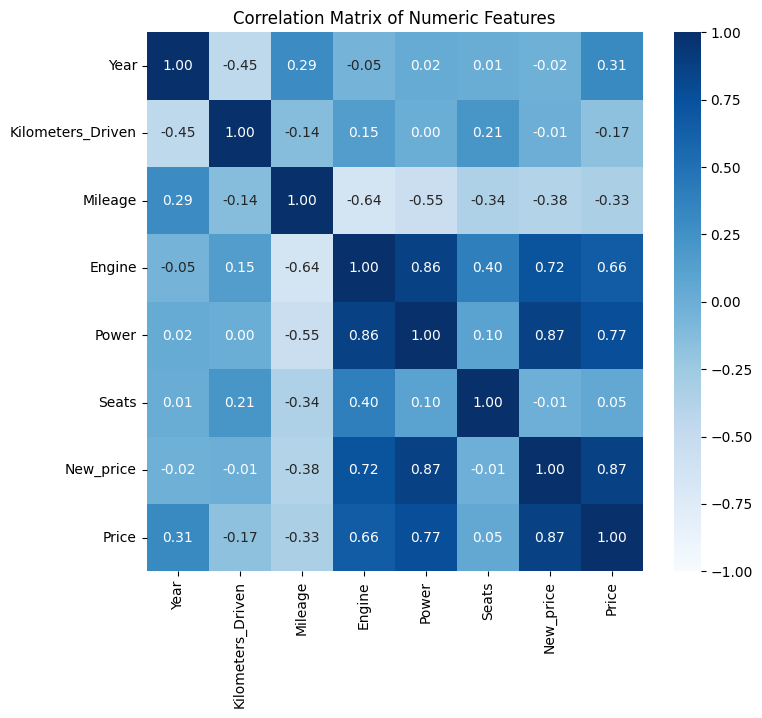

In [23]:
# creating a correlation plot

plt.figure(figsize=(8,7))

sns.heatmap(data=corr_plot, annot=True, vmin=-1, vmax=1, center=0, fmt=".2f", cmap="Blues")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

The correlation matrix reveals meaningful relationships among the numeric features: 

A strong positive correlation is observed between Engine and Power (0.86), indicating that larger engine sizes are associated with higher power output.

The used car Price is strongly correlated with Power (0.77) and Engine (0.66), suggesting that engine size and power remain important factors of vehicle value even in the secondary market. 

Negative correlations are observed between Mileage and both Engine (-0.64) and Power (-0.55). This aligns with expectations, as vehicles with larger and more powerful engines typically have lower fuel efficiency. 

Additionally, Year and Kilometers_Driven show a moderate negative correlation (-0.45), indicating that newer vehicles generally have lower accumulated usage, while older vehicles tend to have higher mileage. In contrast, Year and Mileage show a positive correlation (0.29), which likely reflects improvements in fuel efficiency in newer vehicle models over time.

The correlation analysis shows that New_price is strongly correlated with Price (0.87) as well as with key numeric predictors such as Engine (0.72) and Power (0.87), indicating that vehicles with larger engines and higher power tend to have higher original market prices. This confirms that New_price captures information similar to the target variable (Price)  present in the dataset. However, since the dataset focuses on used car pricing and approximately 86% of the values in New_price are missing, imputing this feature would result in most of the column being artificially generated. Given that Price already reflects the effect of engine size and power in the secondary market and contains complete information, New_price does not provide sufficient additional value. Therefore, the New_price feature will be excluded from the modeling stage to avoid introducing bias while retaining more reliable and informative predictors.

In [24]:
# dropping the New_price column

df = df.drop("New_price", axis=1)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6014,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6015,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6016,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


After completing the cleaning of numerical features, we proceed with the analysis of categorical variables.

In [25]:
# creating a list of categorical columns

cat_columns = ["Name", "Location", "Fuel_Type", "Transmission", "Owner_Type"]

In [26]:
# creating a loop to check the unique values in categorical columns:

for col in cat_columns:
    num_unique_values = df[col].nunique()
    print(col, ":", num_unique_values)

Name : 1876
Location : 11
Fuel_Type : 5
Transmission : 2
Owner_Type : 4


The Name column has a very high number of unique values (1876), representing specific car models and variants. This makes it not suitable for direct encoding in its current form.

Cars are listed across only 11 different locations, indicating a limited number of cities represented in the dataset.

The dataset includes 5 different fuel types, showing some variation but still a manageable number of categories.

There are only two transmission types in the dataset (auto/manual).

The number of previous owners ranges from 1 to 4, which is realistic and consistent with used car data.

## **Univariate Analysis**

#### Univariate Analysis of numerical columns

In [27]:
# creting a function to process the univariate analysis of each numerical column

def hist_boxplot(data, feature, bins=None, figsize=(9,7)):
    
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True, figsize=figsize)

    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True)

    if bins is None:
        sns.histplot(data=data, x=feature, ax=ax_hist, kde=True, color="red")
    else:
        sns.histplot(data=data, x=feature, ax=ax_hist, bins=bins, kde=True, color="red")

    ax_hist.axvline(data[feature].mean(), color="black", linestyle = "-")
    ax_hist.axvline(data[feature].median(), color="gold", linestyle= "--")

    plt.tight_layout()
    plt.show()

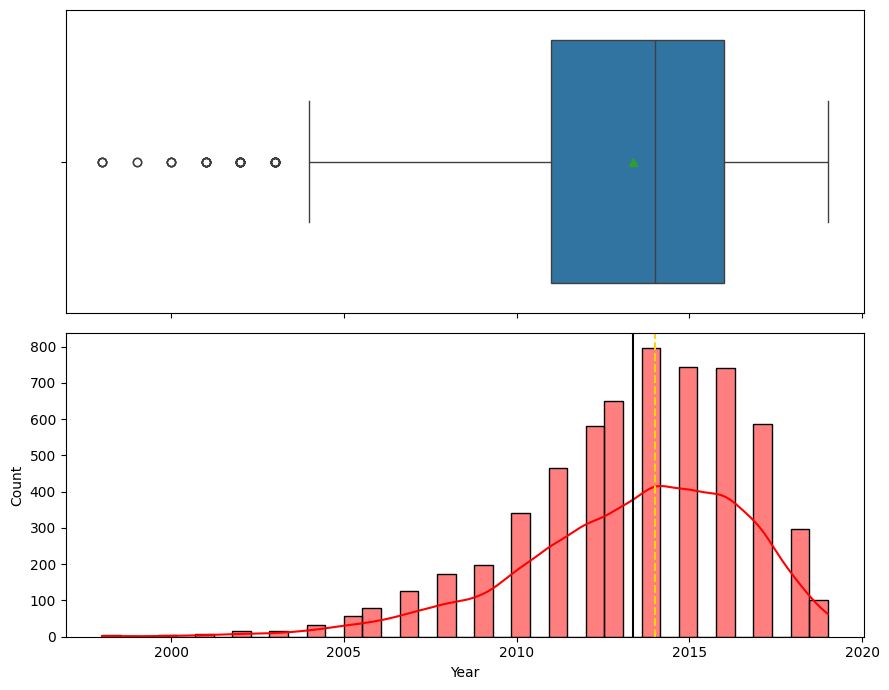

In [28]:
hist_boxplot(df, "Year")


As seen from the Year distribution, the data is left-skewed, with most vehicles manufactured between 2013 and 2018, and a clear peak around 2014–2015. This indicates that the dataset is dominated by relatively newer used cars. A small number of older vehicles manufactured in the early 2000s appear as left-side outliers, but they represent a minor portion of the data.

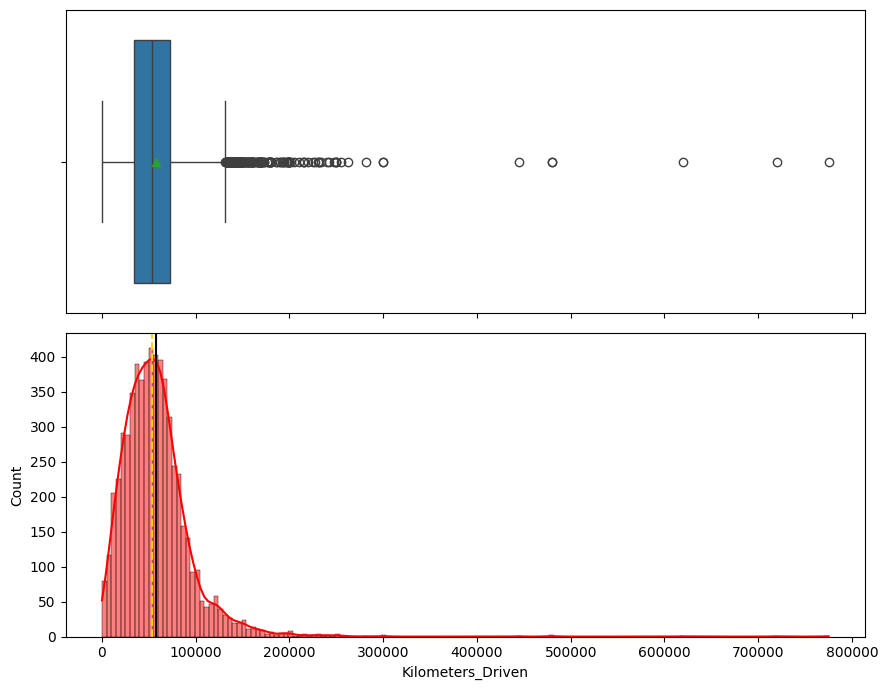

In [29]:
hist_boxplot(df, "Kilometers_Driven")

The Kilometers_Driven distribution is highly right-skewed, with most vehicles having mileage concentrated around 40,000–70,000 km, which is typical for used cars. However, a substantial number of observations lie far on the right tail, with values exceeding 100,000 km and reaching up to 800,000 km. While high mileage is expected in used-car data, extremely large values represent potential outliers and may indicate data entry errors or vehicles with unusually heavy usage. Such observations can disproportionately influence model performance and therefore require careful treatment.

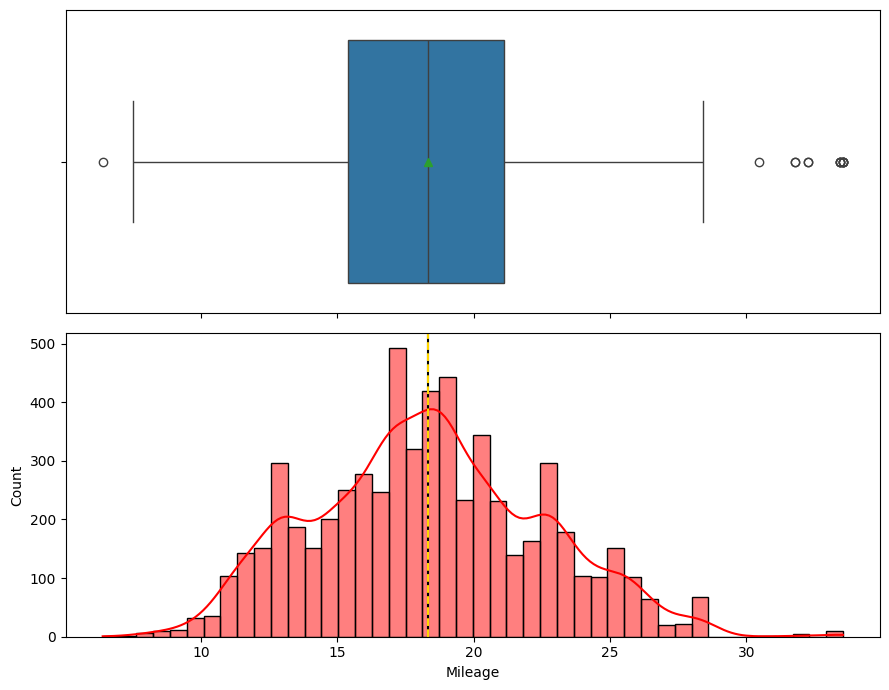

In [30]:
hist_boxplot(df, "Mileage")

The Mileage distribution is approximately normally distributed, with the mean and median both located around 18 km/l. Most observations are concentrated between 10 and 30 km/l, which represents the typical fuel efficiency range for vehicles in the dataset. A small number of outliers are present on both the lower and higher ends, but they are relatively rare compared to the main cluster.

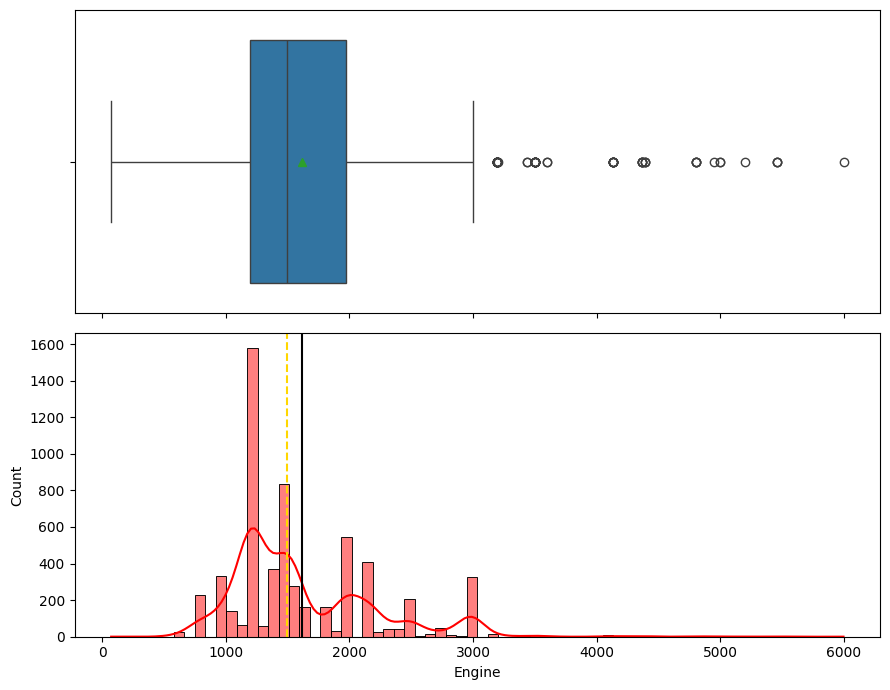

In [31]:
hist_boxplot(df, "Engine")

The Engine variable shows a right-skewed distribution, with most vehicles concentrated around an engine size of approximately 1400 cc. The kde line is not smooth and displays multiple peaks, indicating that the dataset contains several common engine size groups rather than a single dominant value. This reflects the wide variety of vehicle types included in the data.
A number of large outliers are present on the right side of the distribution, representing vehicles with significantly larger engines. These are relatively few compared to the main cluster and likely correspond to premium or high-performance cars.

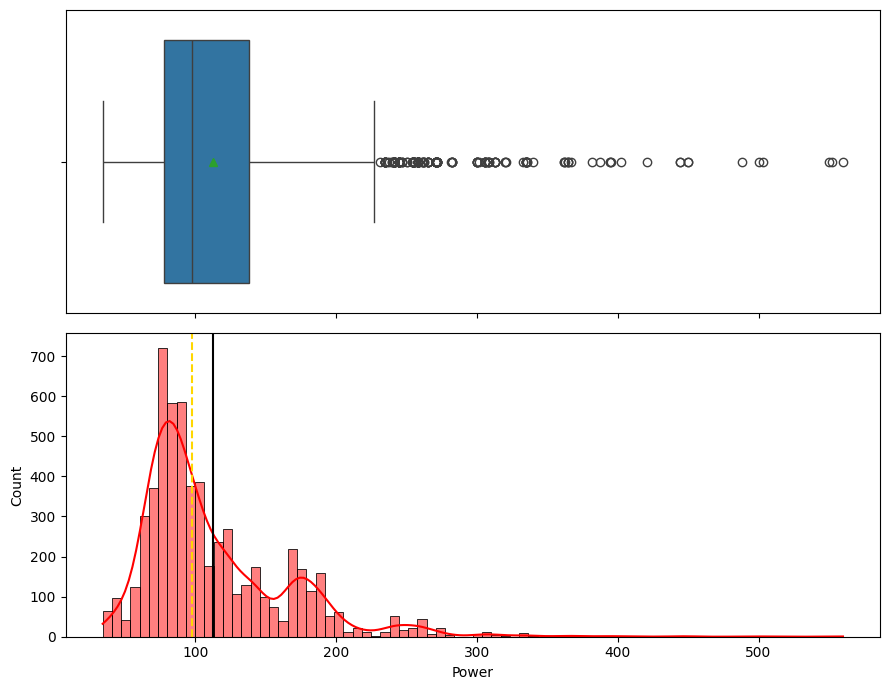

In [32]:
hist_boxplot(df, "Power")

The Power variable shows a right-skewed distribution, with most vehicles clustered at lower power values, and a small number of high-power cars appearing as outliers.
The KDE curve has multiple peaks, indicating that vehicles are grouped into distinct power levels rather than being evenly distributed. This pattern is similar to the Engine variable, which is expected since Engine and Power are strongly correlated. Vehicles with larger engines generally produce higher power, resulting in similar distribution shapes.

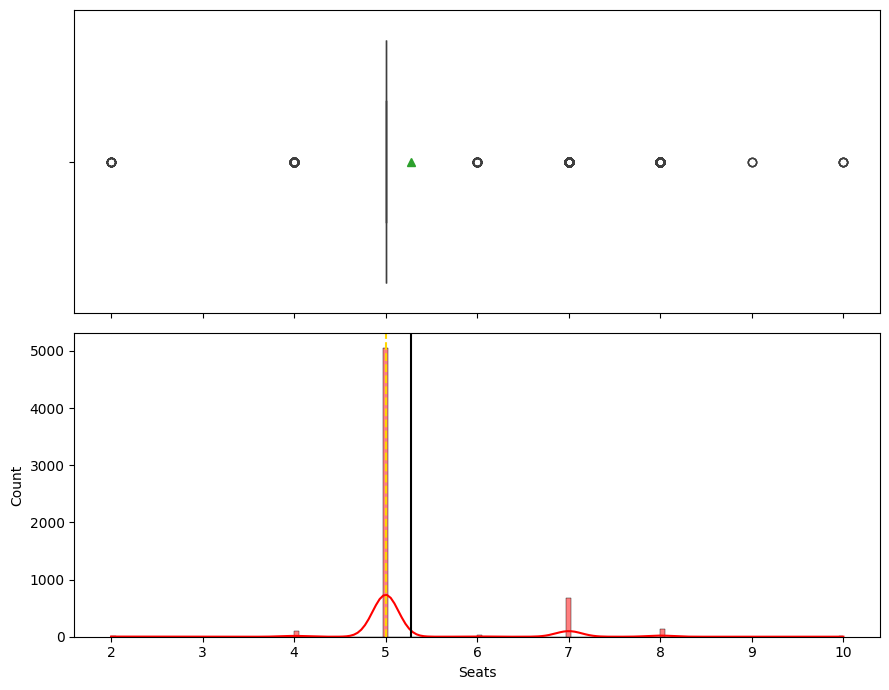

In [33]:
hist_boxplot(df, "Seats")

The Seats variable shows a highly concentrated distribution, with the majority of vehicles having 5 seats, which is the industry standard for passenger cars. Other seat counts such as appear as outliers and are very rare in the dataset. Among these, 7-seat vehicles are the most common alternative configuration, but their frequency is still much lower compared to 5 seat cars. 

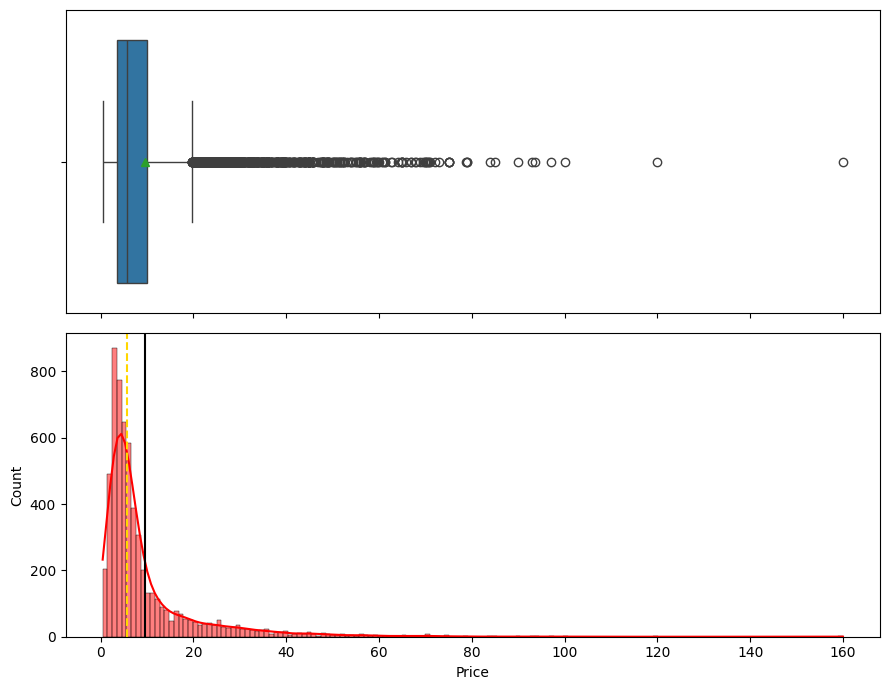

In [34]:
hist_boxplot(df, "Price")

Looking at the Price column, most vehicle prices are concentrated in the lower range (roughly between 1 and 20), with the median around 10. The distribution is clearly right-skewed, meaning that while most cars are relatively affordable, a small number of vehicles are priced much higher than the rest. This skewness needs to be taken into consideration in the analysis, as these high-priced cars can disproportionately influence relationships with other variables.

#### Univariate Analysis of categorical columns

The Name column contains a very large number of unique values, as each entry represents a specific car brand and model. Thus, univariate visualization for this variable would not be informative, and it is excluded from the analysis.

In [35]:
# creating a function for all categorical columns

def perc_on_bar(data, feature):
   

    total = len(data[feature])  # Length of the column
    plt.figure(figsize=(9, 7))
    ax = sns.countplot(data=data, x=feature, palette='Paired', hue=feature,
                       order=data[feature].value_counts().index)
    
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) 
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()  

        ax.annotate(percentage, (x, y), size=12, ha='center') 

    plt.xticks(rotation=45)
    plt.show()

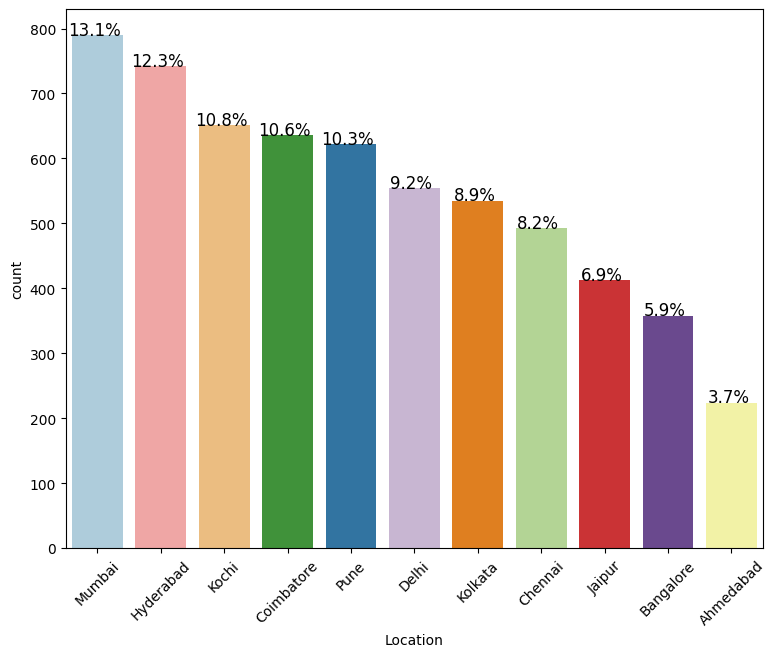

In [36]:
perc_on_bar(df, "Location")

According to the plot, most of the cars are listed in Mumbai (13.1%), followed by Hyderabad (12.3%). Other major contributors are Kochi, Coimbatore, Pune, and Delhi, each accounting for around 10% of the listings. This distribution is expected, as these cities are among the largest metropolitan areas in India with high vehicle demand.

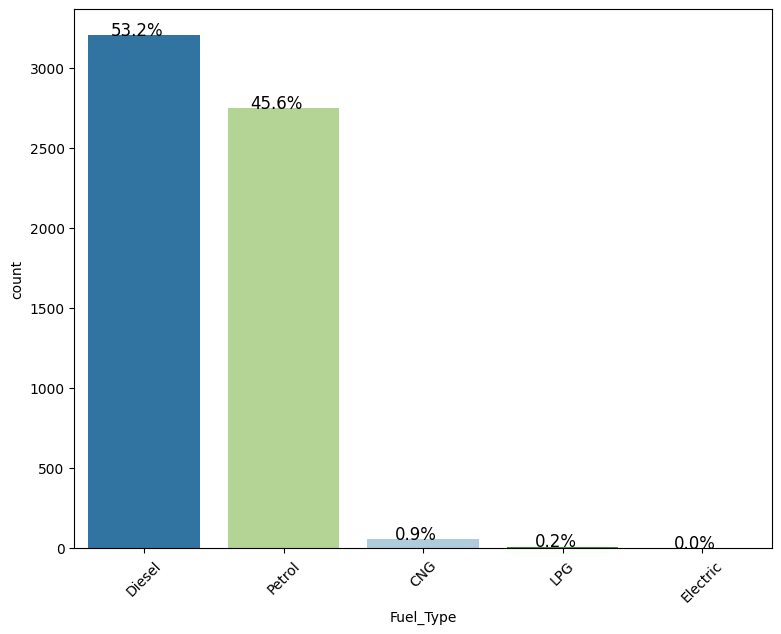

In [37]:
perc_on_bar(df, "Fuel_Type")

There are no electric vehicles in the dataset. Diesel (53.2%) and petrol (45.6%) are the dominant fuel types, together accounting for almost the entire dataset. Thus, in India diesel and petrol vehicles are far more common than alternative fuel options such as CNG, LPG, or electric vehicles.

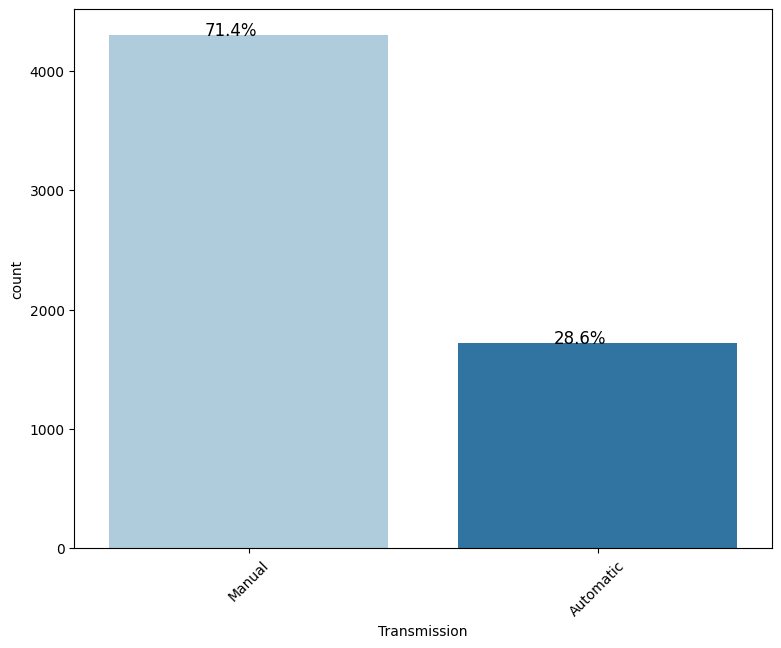

In [38]:
perc_on_bar(df, "Transmission")

There are only two types of transmission in the dataset: manual and automatic. Most cars use manual transmission (71.4%), while automatic transmission (28.6%) is less common.

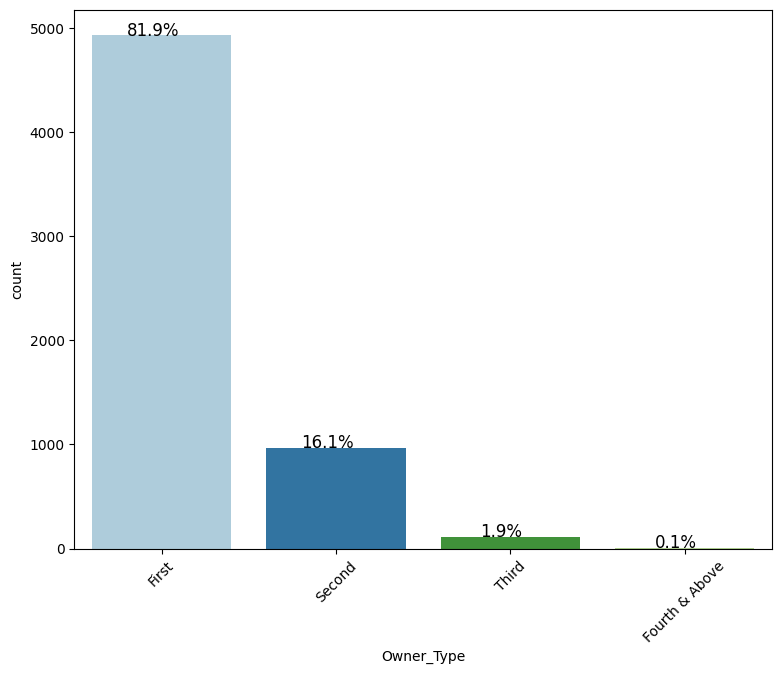

In [39]:
perc_on_bar(df, "Owner_Type")

The majority of the cars are first-owner vehicles (81.9%), followed by second-owner cars (16.1%). Very few cars have third or more owners. This suggests that most vehicles in the dataset have low ownership turnover and are not frequently resold.


### *Outlier Treatment (Identified During Univariate Analysis)*

As observed in the univariate analysis, the variable Kilometers_Driven contains extreme values that may disproportionately influence its relationship with the target variable (Price). Therefore, these extreme values will be treated using the IQR method prior to the analysis and modeling to reduce the impact of outliers and improve the interpretability of the relationships.

In [40]:
# identifying outliers in Kilometers_Driven column

q1 = df["Kilometers_Driven"].quantile(0.25)
q3 = df["Kilometers_Driven"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr

low_outliers = (df["Kilometers_Driven"] < lower_bound).sum()
upper_outliers = (df["Kilometers_Driven"] > upper_bound).sum()

print(low_outliers, upper_outliers)

0 201


The upper bound contains 201 outliers, that needs to be treated. 

In [41]:
# treating the outliers

df['Kilometers_Driven'] = np.where(df['Kilometers_Driven'] > upper_bound,
    upper_bound, df['Kilometers_Driven'])

In [42]:
df["Kilometers_Driven"].describe()

count      6018.000000
mean      56094.368727
std       30027.394174
min         171.000000
25%       34000.000000
50%       53000.000000
75%       73000.000000
max      131500.000000
Name: Kilometers_Driven, dtype: float64

The extreme values in Kilometers_Driven were capped using the IQR method to reduce their impact on the analysis.

### *Log Transformation of the Target Variable (Price)*

Since the Price variable is strongly right-skewed, a log transformation will be applied to reduce the impact of very high prices and make patterns in the data easier to interpret. Unlike Kilometers_Driven, which was modified to handle extreme values, Price is the target variable, so the original values are kept and a log-transformed version is added as a new column.

In [43]:
# transforming the Price column and adding it to the dataset

df['Log_Price'] = np.log(df['Price'])
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Log_Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,2.525729
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,1.504077
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,2.875822
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Maruti Swift VDI,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,1.558145
6014,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,1.386294
6015,Mahindra Xylo D4 BSIV,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,1.064711
6016,Maruti Wagon R VXI,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,0.974560


In [44]:
df[["Price", "Log_Price"]].describe()

,Price,Log_Price
count,6018.000000,6018.000000
mean,9.470243,1.824705
std,11.165926,0.873606
min,0.440000,-0.820981
25%,3.500000,1.252763
50%,5.640000,1.729884
75%,9.950000,2.297573
max,160.000000,5.075174


Comparing the original Price values with Log_Price, we can see that the log transformation compresses very high prices, reducing the value's spread and making the distribution less skewed. Some log prices became negative because the original prices were below 1, thus, it is expected.

## **Bivariate Analysis**

### *Bivariate Analysis of numeric columns*

Bivariate analysis will be conducted to explore the relationship between selected numeric features and the log-transformed target variable (Log_Price). Based on the correlation matrix, Engine and Power were identified as the two most strongly correlated predictors with Price. Other numeric features exhibited weaker or moderate correlations. Therefore, scatter plots will be used for Engine and Power to further examine their relationship with Log_Price.

In [45]:
# creating a function for Bivariate Analysis of numeric columns

def scatter (data, predictor, target, color = "#4C7F7A", alpha=0.6):
    plt.figure(figsize=(7, 6))
    sns.scatterplot(data=data, x=predictor, y=target, 
                     color=color)
    
    
    plt.title(f"{predictor} vs {target}")
    plt.tight_layout()
    plt.show()

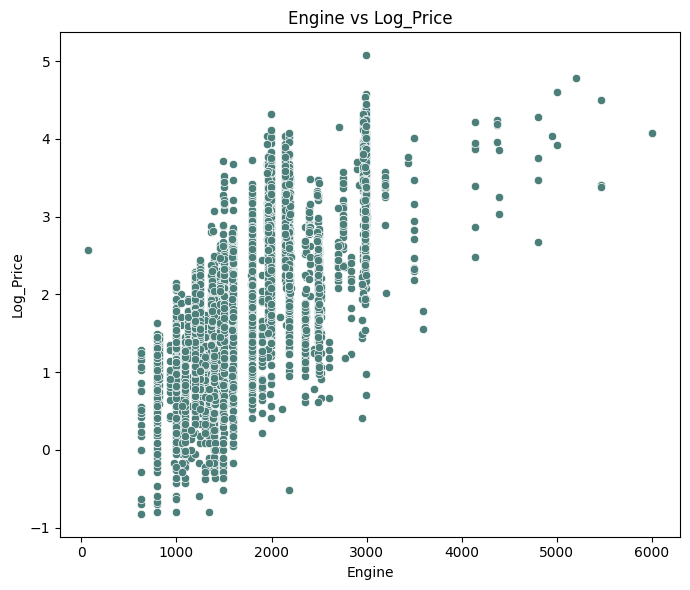

In [46]:
scatter(df, "Engine", "Log_Price")

As the scatter plot indicates, vehicles with smaller engine sizes tend to have lower log-transformed prices, while larger engines are generally associated with higher prices. This confirms the positive correlation between Engine and Price observed in the correlation analysis.

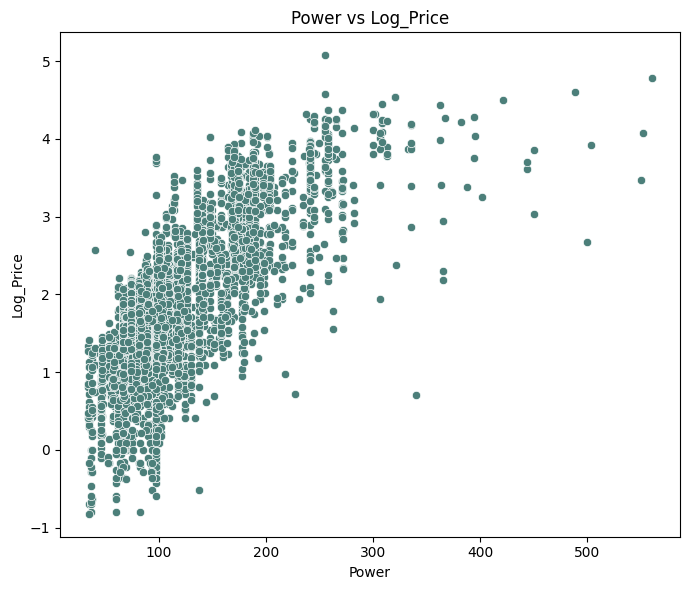

In [47]:
scatter (df, "Power", "Log_Price")

The scatter plot shows a strong positive relationship between power and the log-transformed price, indicating that vehicles with higher power tend to be priced higher. Most observations are clustered around lower power values, while only a small number of vehicles have substantially higher power levels.

### *Bivariate Analysis of categorical columns*

In this section, we will examine how the log-transformed price varies across selected categorical variables. The analysis will focus on categories that show clear differences in vehicle prices, such as Location, Fuel_Type, and Transmission. Categories with little variation are not emphasized, as they do not provide much additional insighs. 

In [48]:
# creating a boxplot function

def box (data, feature, target, figsize=(7,6)):

    order = data[feature].value_counts().index


    plt.figure(figsize=figsize)
    sns.boxplot(data=data, x=feature, y=target, color = "#596C9A", order=order)
    
    plt.xticks(rotation=45)
    plt.title(f"{feature} vs {target}")
    plt.tight_layout()
    plt.show()

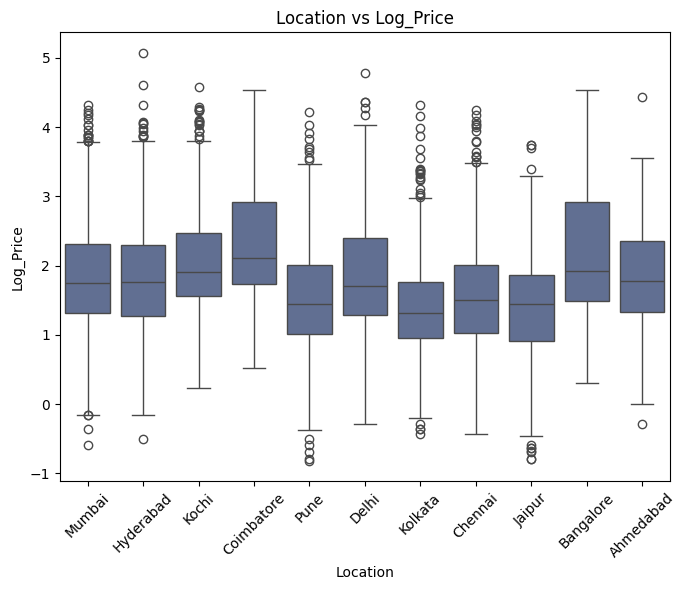

In [49]:
box(df, "Location", "Log_Price")

The box plot shows that the distribution of log-transformed prices is relatively similar across locations. While some locations exhibit slightly higher median prices, the overall differences are modest, suggesting that location does not strongly differentiate vehicle prices.

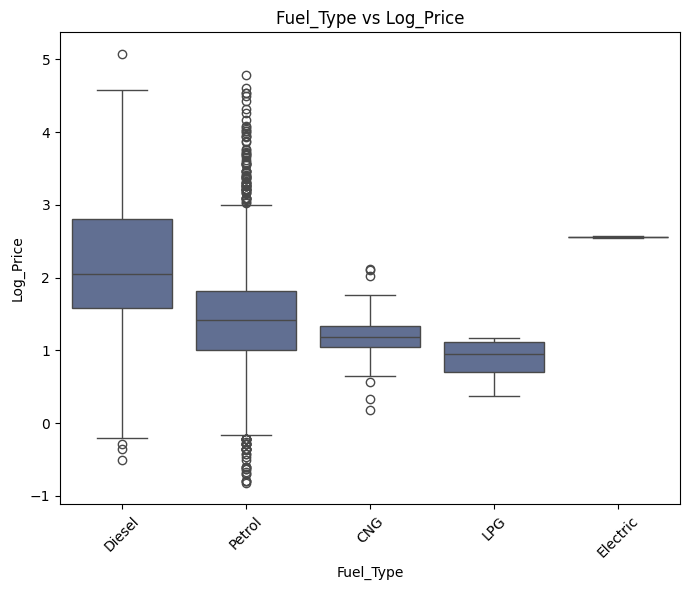

In [50]:
box(df, "Fuel_Type", "Log_Price")

The box plot shows clear differences in log-transformed prices across fuel types. Diesel vehicles have the highest median prices, followed by petrol, while CNG and LPG vehicles are generally priced lower. This indicates that fuel type is associated with differences in vehicle pricing.

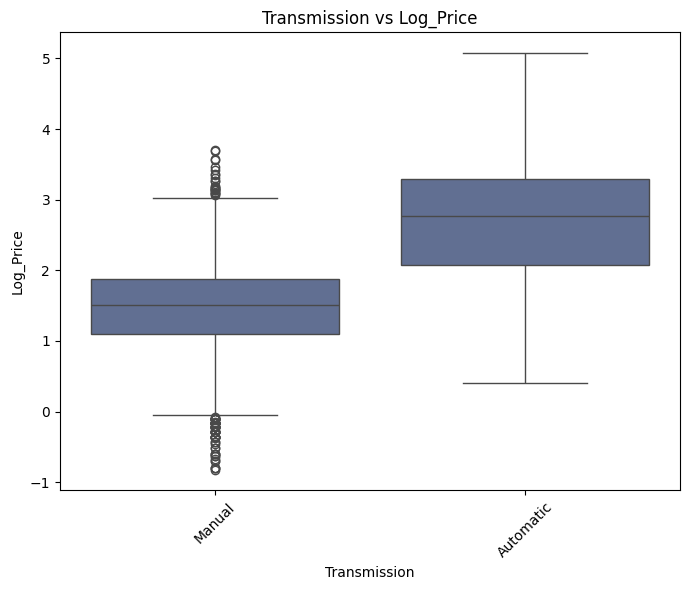

In [51]:
box(df, "Transmission", "Log_Price")

The box plot shows that vehicles with automatic transmission tend to have higher log-transformed prices than manual vehicles. However, the difference is moderate, indicating that transmission type influences price but is not the primary factor determining vehicle value. 

### *Important Insights from EDA and Data Preprocessing*

As we can see from the exploratory data analysis, used car prices are influenced by a combination of vehicle specifications and usage-related factors. Variables such as year, engine, power, and kilometers driven show noticeable relationships with price, while categorical variables like fuel type, transmission, location, and owner type also help explain differences in pricing. Besides, during the EDA analysis, we identified missing values and outliers in some features, which were handled during the data cleaning stage to make the dataset suitable for modeling. Overall, the patterns observed in both univariate and bivariate analysis confirm that the dataset contains strong predictive signals, and after cleaning and preprocessing, it is ready for feature engineering and model development.

## **Feature Engineering**

### *Extracting the feature*

The Name column contains both brand and model information, which results in too many unique values to be useless for prediction. To make this feature more meaningful, we will extract the brand name and use it in further analysis.

In [52]:
# extracting the brand name

df["Brand"] = df["Name"].str.split().str[0]

In [53]:
df["Brand"].nunique()

31

In [54]:
# dropping Name column

df = df.drop("Name", axis=1)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Log_Price,Brand
0,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,0.559616,Maruti
1,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,2.525729,Hyundai
2,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,1.504077,Honda
3,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1.791759,Maruti
4,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,2.875822,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,Delhi,2014,27365.0,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,1.558145,Maruti
6014,Jaipur,2015,100000.0,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,1.386294,Hyundai
6015,Jaipur,2012,55000.0,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,1.064711,Mahindra
6016,Kolkata,2013,46000.0,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,0.974560,Maruti


As a result, a new Brand column was created, and the original Name column was removed from the dataset. 

### *Encoding categorical variables*

Since all categorical columns are of object data type, they need to be encoded into numerical values before modeling. Therefore, we will perform one-hot encoding on the categorical variables and create a new Dataframe containing all encoded features. First, we update the list of categorical columns.

In [55]:
# updating Categorical columns list

cat_columns = ["Location", "Fuel_Type", "Transmission", "Owner_Type", "Brand"]

In [56]:
# creating new encoded data frame

dummies_df = pd.get_dummies(df, columns=cat_columns, drop_first=True)
dummies_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Log_Price,Location_Bangalore,Location_Chennai,...,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo
0,2010,72000.0,26.60,998.0,58.16,5.0,1.75,0.559616,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015,41000.0,19.67,1582.0,126.20,5.0,12.50,2.525729,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011,46000.0,18.20,1199.0,88.70,5.0,4.50,1.504077,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2012,87000.0,20.77,1248.0,88.76,7.0,6.00,1.791759,False,True,...,False,False,False,False,False,False,False,False,False,False
4,2013,40670.0,15.20,1968.0,140.80,5.0,17.74,2.875822,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,2014,27365.0,28.40,1248.0,74.00,5.0,4.75,1.558145,False,False,...,False,False,False,False,False,False,False,False,False,False
6014,2015,100000.0,24.40,1120.0,71.00,5.0,4.00,1.386294,False,False,...,False,False,False,False,False,False,False,False,False,False
6015,2012,55000.0,14.00,2498.0,112.00,8.0,2.90,1.064711,False,False,...,False,False,False,False,False,False,False,False,False,False
6016,2013,46000.0,18.90,998.0,67.10,5.0,2.65,0.974560,False,False,...,False,False,False,False,False,False,False,False,False,False


The dataset now contains 6,018 rows and 56 fully encoded columns. With feature engineering complete, we can proceed to splitting the data into training and testing sets before building regression models.

### *Splitting the Data*

In [57]:
# splitting the data into target and predictor variables

X = dummies_df.drop(["Price", "Log_Price"], axis=1)
y = dummies_df["Log_Price"]

In [58]:
# splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)
print(X_train.shape)
print(X_test.shape)

(4814, 54)
(1204, 54)


The data was split into training and test sets (80/20). The training set contains 4,814 rows and the test set contains 1,204 rows, with 54 features in both sets.

## **Building Various Models**

### *Model Performance Matrix*

To evaluate model performance, several metrics will be used. R2 and Adjusted-R2 will help show how well a model explains the variation in car prices. RMSE and MAE will be used to measure how close the predicted values are to the actual prices, with RMSE giving more weight to larger errors and MAE showing the average prediction error.

In [59]:
# creating adjusted R-2 metric

def adjusted_r2(X, y, y_pred):
    r2 = r2_score(y, y_pred)
    n = X.shape[0]
    k = X.shape[1]
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [60]:
# creating a model_performace_matrix

def model_performance_matrix (model, X, y):

    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    adj_r2 = adjusted_r2(X, y, y_pred)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)

    df_model_performance_matrix = pd.DataFrame(
      {"R2": [r2],
       "Adj_R2": [adj_r2],
       "RMSE": [rmse],
       "MAE": [mae]})

    return df_model_performance_matrix

### *Linear Regression Model*

After preprocessing the data, including encoding categorical variables and splitting into training and test sets, a baseline Linear Regression model will be trained using the modified dataset. The target variable is defined as Log_Price, while the remaining variables are used as predictors.

In [61]:
# Building a Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
# Linear Regression evaluation of train set

model_performance_matrix(lr, X_train, y_train)

,R2,Adj_R2,RMSE,MAE
0,0.923389,0.922519,0.241045,0.179012


In [63]:
# Linear Regression evaluation of test set

model_performance_matrix(lr, X_test, y_test)

,R2,Adj_R2,RMSE,MAE
0,0.930813,0.927561,0.23249,0.178588


The Linear Regression model shows very similar performance on both the training and test sets, which suggests that the model generalizes well to unseen data. The adjusted R2 on the test set is slightly higher than on the training set, indicating that the model is not overfitting. This confirms that the linear relationships learned by the model are stable and consistent.

### *Feature Scaling*

Since the features are measured in different units and ranges, Ridge and Lasso models can be biased toward features with larger numerical values. To ensure that all features contribute fairly to the model, StandardScaler is applied to scale the data to a common range.

In [64]:
# Scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### *Ridge Regression Model*

In [65]:
# Building a Ridge Regression Model (L2)

rr = Ridge()
rr.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [66]:
# Ridge Regression evaluation of train set

model_performance_matrix(rr, X_train_scaled, y_train)

,R2,Adj_R2,RMSE,MAE
0,0.923389,0.922519,0.241045,0.179018


In [67]:
# Ridge Regression evaluation of test set

model_performance_matrix(rr, X_test_scaled, y_test)

,R2,Adj_R2,RMSE,MAE
0,0.930811,0.927559,0.232493,0.178597


Since the results of Ridge Regression are nearly identical to those of Linear Regression, we can conclude that the linear model is already stable and does not suffer from large coefficients that require penalization. On the training set, both models achieved an R2 of approximately 0.923 and an RMSE of about 0.242, while on the test set the R2 remained around 0.930 with an RMSE close to 0.235. The adjusted R2 and MAE values are also almost the same across both models.

### *Lasso Regression*

In [68]:
# Building a Lasso Regression Model (L1)

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [69]:
# Lasso Regression evaluation of train set

model_performance_matrix(lasso, X_train_scaled, y_train)

,R2,Adj_R2,RMSE,MAE
0,0.0,-0.011347,0.870867,0.673807


In [70]:
# Lasso Regression evaluation of test set

model_performance_matrix(lasso, X_test_scaled, y_test)

,R2,Adj_R2,RMSE,MAE
0,-0.000675,-0.047705,0.884175,0.690888


In [71]:
# checking the number of coefficinets Lasso zerod out

lasso_coef = pd.Series(lasso.coef_, index=X_train.columns)

num_zero = (lasso_coef == 0).sum()
num_nonzero = (lasso_coef != 0).sum()

print(num_zero, num_nonzero)

54 0


As per Lasso model, with default regularization strength (alpha = 1.0) all features were stricly penalized and got 0 value. As a result, the model was unable to learn meaningful relationships between predictors and the target variable, leading to very poor performance on both training and test sets. This outcome indicates that Lasso regularization is too restrictive for this dataset and that the predictive signal is distributed across multiple correlated features. Therefore, Linear and Ridge Regressions are more appropriate for this problem.

### *Decision Tree*

Regularization did not meaningfully improve performance, suggesting that linear assumptions limit further gains. Therefore, we will explore tree-based models to capture non-linear relationships.

In [72]:
# Building a Decision Tree model

dtree = DecisionTreeRegressor(random_state=1)
dtree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [73]:
# Decision Tree evaluation of train set

model_performance_matrix(dtree, X_train, y_train)

,R2,Adj_R2,RMSE,MAE
0,0.999983,0.999982,0.003627,0.000225


As per the training results, the Decision Tree model almost perfectly fits the training data, achieving an R2 very close to 1 (0.99). This suggests that the model has memorized the training set and is likely overfitting.

In [74]:
# Decision Tree evaluation of test set

model_performance_matrix(dtree, X_test, y_test)

,R2,Adj_R2,RMSE,MAE
0,0.891893,0.886812,0.290616,0.195663


The Decision Tree model achieves near-perfect performance on the training set, but shows a noticeable drop on the test set (0.90), confirming overfitting. Despite capturing non-linear relationships, the Decision Tree performs slightly worse than Linear Regression on the test set in terms of R2 and adjusted R2, indicating weaker generalization and a higher degree of memorization.

### *Random Forest*

To improve generalization, we next will apply a Random Forest model, which aggregates multiple decision trees to produce more stable predictions.

In [75]:
# # Building a Random Forest model

rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [76]:
# Random Forest evaluation of train set

model_performance_matrix(rf, X_train, y_train)

,R2,Adj_R2,RMSE,MAE
0,0.990624,0.990517,0.084327,0.055522


In [77]:
# Random Forest evaluation of test set

model_performance_matrix(rf, X_test, y_test)

,R2,Adj_R2,RMSE,MAE
0,0.950896,0.948588,0.195863,0.139239


The Random Forest model demonstrates strong predicting results, achieving an R2 of 0.99 on the training set and 0.95 on the test set, with relatively low prediction errors, indicating stable and accurate performance on unseen data.

On the test set, the Decision Tree achieves lower predictive performance compared to Linear Regression and Random Forest, confirming that overfitting negatively affects its generalization. Random Forest outperforms both models, achieving the highest R2 (0.95) and adjusted R2 (0.94), as well as the lowest RMSE (0.19) and MAE (0.13), making it the best-performing model. Therefore, hyperparameter tuning will be applied to the Random Forest model to evaluate whether its performance can be further improved.

### *Hyperparameter Tuning: Random Forest*

To improve the Random Forest model, GridSearchCV is used for hyperparameter tuning. The tuning focuses on controlling model complexity by limiting tree depth (max_depth) and ensuring a sufficient number of samples in each leaf (min_samples_leaf), which helps reduce overfitting and improve generalization on unseen data.

In [78]:
# Building a Random Forest hyperparameter tuning

rf_estimator = RandomForestRegressor(random_state=1, n_jobs=-1)

parameters ={ "n_estimators": [100, 200],
              "max_depth": [None, 10, 20],
              "min_samples_leaf": [1, 5, 10]}

grid_search = GridSearchCV(estimator=rf_estimator,
    param_grid=parameters, cv=5, scoring="r2")

grid_search.fit(X_train, y_train)

tuned_rf = grid_search.best_estimator_

tuned_rf


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [79]:
# Random Forest hyperparameter evaluation of train set

model_performance_matrix(tuned_rf, X_train, y_train)

,R2,Adj_R2,RMSE,MAE
0,0.990936,0.990833,0.082912,0.054995


In [80]:
# Random Forest hyperparameter evaluation of test set

model_performance_matrix(tuned_rf, X_test, y_test)

,R2,Adj_R2,RMSE,MAE
0,0.950839,0.948528,0.195976,0.139056


Hyperparameter tuning of the Random Forest model resulted in performance very similar to the baseline Random Forest. Both models achieved a test R2 of approximately 0.95, with nearly identical RMSE and MAE values. This indicates that the baseline Random Forest model was already well optimized, and additional tuning did not lead to meaningful improvements in generalization.

### *Model Comparison & Evaluation*

To compare the performance of all trained models, a summary table will be created using R2 and RMSE, which are selected as the primary measures of success. R2 captures how well each model explains price variation, while RMSE reflects the average prediction error used to guide final model selection. 

In [81]:
# Creating a function that turns train and test R2 and RMSE for all models

def get_model_score(model):
    
    if model in [rr, lasso]:
        Xtrain, Xtest = X_train_scaled, X_test_scaled
    else:
        Xtrain, Xtest = X_train, X_test

    y_train_pred = model.predict(Xtrain)
    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

    y_test_pred = model.predict(Xtest)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    return r2_train, r2_test, rmse_train, rmse_test

In [82]:
# creating a comparison table

models = [lr, rr, lasso, dtree, rf, tuned_rf]

model_names = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Decision Tree",
    "Random Forest",
    "Tuned Random Forest"]

r2_train, r2_test, rmse_train, rmse_test = [], [], [], []

for model in models:
    j = get_model_score(model)
    r2_train.append(j[0])
    r2_test.append(j[1])
    rmse_train.append(j[2])
    rmse_test.append(j[3])

comparison_df = pd.DataFrame({
    "Model": model_names,
    "Train_R2": r2_train,
    "Test_R2": r2_test,
    "Train_RMSE": rmse_train,
    "Test_RMSE": rmse_test})

comparison_df

,Model,Train_R2,Test_R2,Train_RMSE,Test_RMSE
0,Linear Regression,0.923389,0.930813,0.241045,0.232490
1,Ridge Regression,0.923389,0.930811,0.241045,0.232493
2,Lasso Regression,0.000000,-0.000675,0.870867,0.884175
3,Decision Tree,0.999983,0.891893,0.003627,0.290616
4,Random Forest,0.990624,0.950896,0.084327,0.195863
5,Tuned Random Forest,0.990936,0.950839,0.082912,0.195976


As we can see from the table, Linear Regression and Ridge Regression provide a strong performance, explaining around 93% of the variance in used car prices. Both models show very similar results, which suggests that the linear model is already stable and does not benefit from additional regularization. Lasso Regression, on the other hand, performs poorly, as the regularization is too strong and removes important predictive information from the model.

The Decision Tree achieves almost perfect performance on the training data, but its test performance is noticeably lower, which indicates overfitting. Random Forest shows the best overall performance, with the highest test R2 and the lowest test RMSE, thus demonstrating strong generalization to unseen data. Hyperparameter tuning of the Random Forest model results in very similar performance compared to the baseline Random Forest, suggesting that the original model was already close to optimal. Therefore, Random Forest is selected as the final model, as it shows the best performance and hyperparameter tuning does not provide further improvement.

Since the baseline Random Forest model shows the best overall performance, a feature importance analysis is used to identify which features the model considers most important for predicting used car prices.

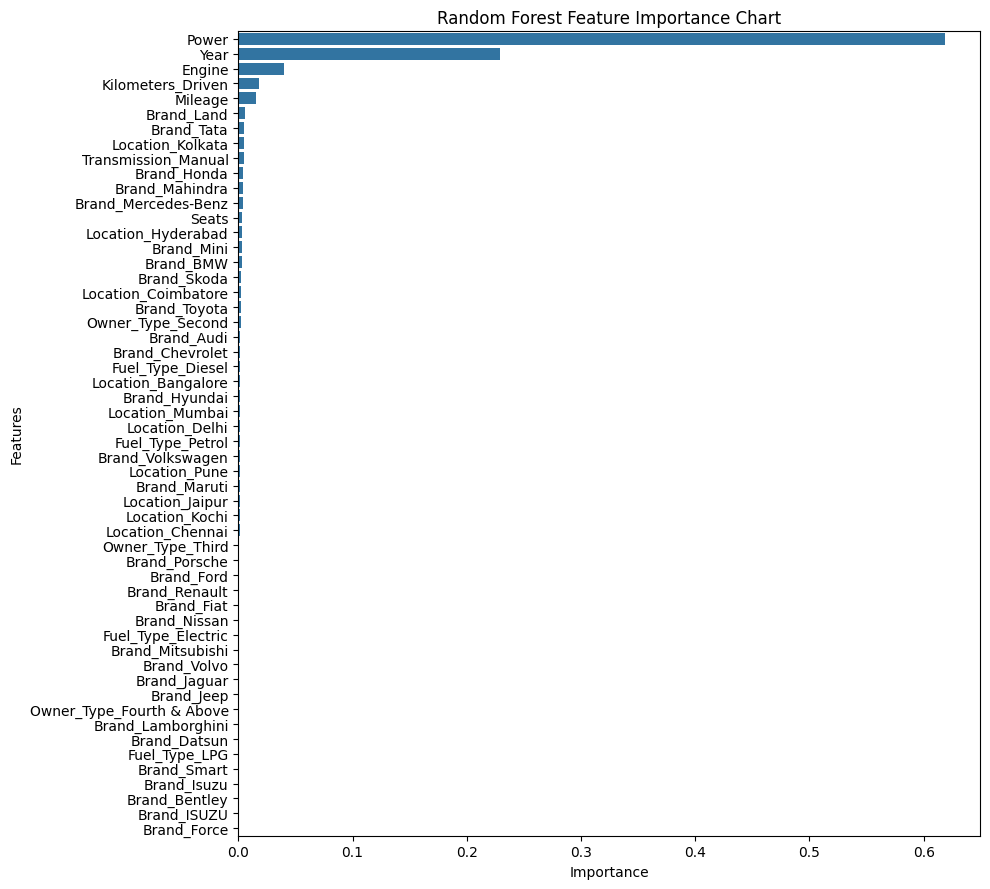

In [83]:
# checking feature importances

importances = rf.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index=columns, columns=['Importance'])\
                     .sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(x=importance_df.Importance, y=importance_df.index)
plt.title("Random Forest Feature Importance Chart")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

The Random Forest feature importance results are consistent with the correlation analysis, which shows that Power, Year, and Engine are strongly correlated with the target variable Price. Although Power and Engine are highly correlated with each other, Random Forest is robust to multicollinearity and prioritizes the feature that contributes most effectively to reducing prediction error. This suggests that Power captures pricing-relevant information more directly than engine size alone.

## **Conclusions and Recommendations**

### *Refined insights* 


The dataset required careful cleaning and preprocessing to address missing values and ensure consistency, as incomplete or inaccurate data can distort price predictions and reduce model reliability. These steps were essential for building robust and trustworthy models.

Many numerical features exhibited right-skewed distributions, which is expected in the used car market due to wide variation in vehicle specifications, usage patterns, and engineering characteristics. Although outliers were present, they represent realistic market scenarios and therefore were retained rather than removed.

The target variable, Price, showed high variance and strong skewness, which made direct modeling less stable. Applying a log transformation helped normalize the distribution and improved model performance by reducing the influence of extreme values.

Linear models provided strong baseline performance, indicating that used car prices have meaningful linear relationships with several explanatory variables. However, introducing regularization through Ridge and Lasso did not lead to further improvements, suggesting that linear regression already captured most of the linear signal present in the data.

Among all models explored, Random Forest demonstrated the best overall performance on unseen data. Its ability to model complex, non-linear interactions allowed it to outperform linear approaches and generalize more effectively.

The Random Forest results reinforce earlier findings by confirming that performance and age-related features play a dominant role in used car pricing, with Power and Year emerging as the most influential predictors.

### *Proposal for the final solution design* 

Based on the comparative analysis, Random Forest is proposed as the final model for used car price prediction. It consistently outperformed both linear and single-tree models by capturing non-linear relationships and interactions among features, resulting in the highest test R2 and lowest prediction error. The model demonstrates strong generalization performance and provides sufficient interpretability through feature importance, making it suitable for practical deployment in a pricing system.

From a business perspective, the results suggest that vehicle power should be treated as a primary driver of used car pricing. Even in cases where mileage or kilometers driven are relatively high, cars with higher power tend to retain more value, as they generally offer better performance, durability, and driving experience. This indicates that pricing strategies should prioritize performance-related features rather than relying solely on usage-based metrics.

The year of manufacture is another key factor influencing price, which aligns with market intuition. Newer vehicles typically offer more modern features, improved safety standards, and longer remaining lifespan, all of which contribute to higher resale value. Therefore, pricing models should consistently account for vehicle age as a major component of valuation.

Additionally, brand reputation plays an important role in determining used car prices. Well-established and premium brands such as Mercedes, Land Rover, Honda, and Tata tend to maintain higher resale values due to perceived reliability, brand trust, and market demand. This suggests that brand-level adjustments should be incorporated into pricing strategies to better reflect consumer preferences.

Finally, the strong performance of the Random Forest model highlights the importance of evaluating multiple features simultaneously rather than relying on individual variables. By aggregating decisions across many trees, the model effectively captures complex interactions between vehicle specifications, usage patterns, and brand characteristics. Given its strong generalization ability and interpretability, the model is suitable for deployment as a decision support tool, with ongoing monitoring and periodic retraining recommended to adapt to changing market conditions.

### *Recommendations for Implementation*

The main recommendation is to use the Random Forest model as the primary tool for predicting used car prices. The model can be integrated into the pricing workflow to generate price suggestions based on vehicle details at the time of listing. These predictions should be used as guidance to support consistent and competitive pricing, rather than replacing human judgment completely.

From a business perspective, this approach can improve pricing accuracy, reduce time cars spend in inventory, and better reflect current market value, which may increase revenue and customer trust. The main costs involve maintaining clean data, updating the model with new listings over time, and retraining it periodically. Since additional hyperparameter tuning did not lead to noticeable performance improvements, it is not recommended due to the extra time and computational cost required.
Potential risks include changes in market conditions, such as shifts in consumer demand, economic trends, or changes in import and trade policies that may affect certain vehicle segments. To manage these risks, the model’s performance should be reviewed regularly, and market trends should be monitored. Relying only on automated pricing without periodic human review may also reduce flexibility in special cases.

The dominance of engine power as a pricing driver suggests that newer, higher-power vehicles should generally be placed at the higher end of the price range within similar listings. Even a modest improvement in pricing accuracy of around 5–8% could help reduce the average time-to-sale by approximately 3–5 days per vehicle, supporting faster inventory turnover and more consistent pricing decisions.

For further analysis, additional market-related features, such as regional demand or brand-based trends, could be included to improve pricing accuracy. Unsupervised learning methods, such as clustering or PCA, could also be applied to identify different vehicle segments and support more targeted pricing strategies.